# ITPP - Lecture 6
A Practical Introduction to the Python Programming Language

# Homework

Homework 5 is due.

Any questions for Homework 5?

## Project Meeting

Schedule a 5 minute meeting with me before the end of week 8 to talk about your project idea. You can schedule a meeting with this [link](https://www.meetingbird.com/meet/johnpham).

![slide](https://imgur.com/bQNidN8.jpg)
Today from 4PM - 5PM in the Creat'R Lab (Orbach Library)

[Facebook Event Page](https://www.facebook.com/events/219824588584784/)

# Review

* File Input and Output
* Using APIs with Requests
* Matplotlib

# Lesson 6 Objectives

* Using GUIs with your programs

# What is a GUI?

Graphical User Interfaces (GUIs) are the composition of elements you interact with on a daily basis. When you open up your browser, you are prompted with the browser's GUI. To navigate to a web page, you simply type the URL into the URL bar and press enter.

![comparison](http://www.itrelease.com/wp-content/uploads/2017/11/GUI-vs-CLI.png)

GUIs allow us to use functions without having to remember what each function is. This is called an abstraction. Abstractions allow us to blackbox functions and allow us to only care about things at the higher level.

# Adding a GUI

Adding a GUI to our Python programs is pretty easy. Let's use the following example:

In [1]:
username = input("What is your name? ")
print("Hello {}!".format(username))

What is your name? Bobo
Hello Bobo!


This works, but what if we want a nicer text box? How about a button to submit the name? Let's introduce `ipywidgets` (pronounced eye-py-widgets).

We will first need to import this module.

In [1]:
from ipywidgets import widgets
from IPython.display import display

text = widgets.Text()
display(text)

A Jupyter Widget

Yay! We've just created out first GUI component. There's 2 things we need to think about when creating GUI components.

1. How will it look? Where will it be displayed?
2. What will happend upon an event?

Events are actions that occur. Think about clicks, keyboard presses, and even hovers. Those are all distinct events, and we can have different actions occur on a different type of event.

For the example above, we've handled 1. For now, we'll be using the default styles provided by the module.

Let's create an action for when we input text into the text box.

In [7]:
text = widgets.Text()
display(text)

def bobo(sender):
    print(text.value)

def printExcited(sender):
    print(text.value +"!!!!!!!!!")
    
text.on_submit(bobo)

A Jupyter Widget

sfdfsdg


Let's break down what happened.

* `text = widgets.Text()` creates a Text component and assigns it to a variable
* `display(text)` displays the component
* `def handle_submit(sender):` is an action we create to be called upon when an event occurs
* `text.on_submit(handle_submit)` is our event listener. When a submit occurs, we want to call the action, which we created as a function, `handle_submit`.

Let's try making a button now.

In [14]:
button = widgets.Button(description="Click me!!")
display(button)

A Jupyter Widget

So we've created a button and assigned it to a variable. Next we need to display that button. Clicking it right now doesn't do anything. Can you think why?

The reason is because when we invoke the **click** event, we want to call an **action**. We haven't assigned which action to call or which event to call the action.

Let's add that now.

In [17]:
button = widgets.Button(description="Click me!")
display(button)

# an action
def on_button_click(sender):
    print("Button was clicked")

def printEmoji(sender):
    print(":)")
    
# an event listener for the button
button.on_click(printEmoji)

A Jupyter Widget

:)
:)
:)
:)
:)
:)
:)


Can components interact with each other? Of course!

Instead of submitting our text input with the enter key, let's do it with a button.

In [18]:
text = widgets.Text()
display(text)

def handle_submit(sender):
    print(text.value)

text.on_submit(handle_submit)

button = widgets.Button(description="Click me!")
display(button)

def on_button_click(sender):
    print(text.value)

button.on_click(on_button_click)

A Jupyter Widget

A Jupyter Widget

Bobo
Bobo
BoboAAnna


So what if we want to remove a component after an action occurs? Let's take the previous example and remove the text input when we submit.

In [25]:
text = widgets.Text()
display(text)

def handle_submit(sender):
    print(text.value)

text.on_submit(handle_submit)

button = widgets.Button(description="Click me!")
display(button)

def on_button_click(sender):
    print(text.value)
    if len(text.value) > 3:
        text.close() # added this to remove the component

button.on_click(on_button_click)

A Jupyter Widget

A Jupyter Widget

So with our components, there's a couple of things we can add when creating them.

In [31]:
text = widgets.Text(value="Placeholder Text",
                    description='label'
                   )

text2 = widgets.Text(value="Placeholder Text",
                     disabled=False,
                     description='User Text'
                    )
text3 = widgets.Text(value="",
                     placeholder="Email",
                     description='Email'
                    )
display(text, text2, text3)

link = widgets.jslink((text, 'value'), (text3, 'value'))

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

There are a couple of other useful components.

In [43]:
dropdown = widgets.Dropdown(
    options=['1', '2', '3'],
    value='1',
    description='Number of Pets:',
    disabled=False,
)

display(dropdown)

input("Disable?")
dropdown.disabled = True

A Jupyter Widget

Disable?fsdfd


In [46]:
radios = widgets.RadioButtons(
    options=['pepperoni', 'pineapple', 'anchovies', 'olives'],
    description='Pizza topping:'
)
display(radios)

A Jupyter Widget

In [50]:
slider = widgets.SelectionSlider(
    options=['scrambled', 'sunny side up', 'poached', 'over easy'],
    value='sunny side up',
    description='I like my eggs ...',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    readout=True
)

display(slider)

A Jupyter Widget

In [64]:
toggles = widgets.ToggleButtons(
    options=['Easy', 'Medium', 'Hard'],
    description='Speed:',
    disabled=False,
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

display(toggles)

buttton = widgets.Button(description="Start Game")

def startGame(sender):
    print("User selected:", toggles.value)
display(buttton)

buttton.on_click(startGame)

A Jupyter Widget

A Jupyter Widget

In [65]:
date = widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)
display(date)

A Jupyter Widget

Let's combine matplotlib with ipywidgets!

For the physics enthusiasts...

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interactive
from IPython.display import Audio, display
import numpy as np

def beat_freq(f1=220.0, f2=224.0):
    max_time = 3
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)
    display(Audio(data=signal, rate=rate))
    return signal
    

v = interactive(beat_freq, f1=(200.0,300.0), f2=(200.0,300.0))
display(v)


A Jupyter Widget

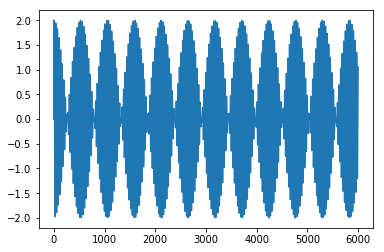

In [71]:
f1, f2 = v.children[:2]
plt.plot(v.result[0:6000]);

For the math enthusiasts...

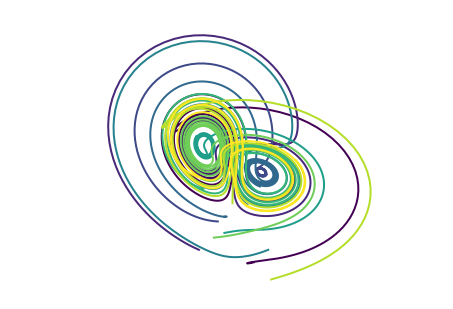

In [73]:
%matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

t, x_t = solve_lorenz(angle=0, N=10)

In [74]:
w = interactive(solve_lorenz, angle=(0.,360.), max_time=(0.1, 4.0), 
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w)

A Jupyter Widget

# Homework 6

There's no "official" homework. Instead of assigning yall another assignment, yall should use the time you would have spent on the assignment on your projects.

Good luck!

Also, I won't be here during Week 7 so we'll have a guest lecture by Zach Zimmerman who is a PhD Candidate for computer science. Please still show up as Zach will be covering new material.